# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

# Introduction

In the realm of data analysis, regression acts as a guiding light. It's a mathematical tool that helps us identify patterns in data, much like connecting the dots on a chart. One of the fundamental forms is linear regression, often represented by the formula:


###                  y = mx + b


Here,y represents the dependent variable, x the independent variable,m the slope derived from the data, and b the intercept.

This method enables us to uncover relationships between different variables and make informed predictions about future outcomes. By understanding these patterns, we gain valuable insights that drive decision-making in various fields.

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |
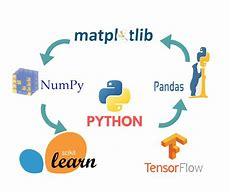
---

### Importing Essential Libraries

To embark on our journey of data analysis and predictive modeling for the Electricity Shortfall Challenge, we rely on a set of powerful libraries that form the backbone of our data-driven exploration. Let's briefly discuss these libraries:

- Pandas: This library is our Swiss army knife for data manipulation. It allows us to load, clean, and transform data effortlessly, providing a solid foundation for our analysis.

- NumPy: For numerical operations, NumPy is indispensable. It empowers us to perform mathematical operations on our data efficiently.

- Matplotlib and Seaborn: These visualization libraries enable us to create insightful plots and graphs, helping us visualize trends and patterns in the data.

- Scikit-Learn (sklearn): This is our workhorse for data preparation and modeling. It offers an array of tools for splitting data, scaling features, building regression models, and evaluating their performance.

In [2]:
# Libraries for data loading, data manipulation and data visulisation
import  pandas as pd  
import numpy as np   
import matplotlib.pyplot as plt 
import seaborn as sns 

# Libraries for data preparation and model building
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 42 ###


#Remove Red warnings
import warnings
warnings.filterwarnings('ignore')

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |
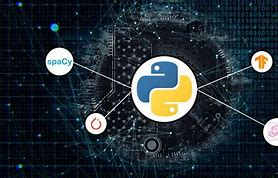
---

Our journey begins with data – the raw material for our analysis and modeling. We'll start by loading the data from the df_train file into a Pandas DataFrame. This tabular structure will serve as our canvas for exploration and model creation.

In [3]:
#load the data
df_train = pd.read_csv("df_train.csv")
df_train.head()

Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  \
0           0  2015-01-01 03:00:00           0.666667           level_5   
1           1  2015-01-01 06:00:00           0.333333          level_10   
2           2  2015-01-01 09:00:00           1.000000           level_9   
3           3  2015-01-01 12:00:00           1.000000           level_8   
4           4  2015-01-01 15:00:00           1.000000           level_7   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             0.666667         74.333333        64.000000   
1             0.0             1.666667         78.333333        64.666667   
2             0.0             1.000000         71.333333        64.333333   
3             0.0             1.000000         65.333333        56.333333   
4             0.0             1.000000         59.000000        57.000000   

   Bilbao_clouds_all  Bilbao_wind_speed  ...  Madrid_temp_max  Barcelona_temp  \
0                0.0           1.000000  ...       265.938000      281.013000   
1                0.0           1.000000  ...       266.386667      280.561667   
2                0.0           1.000000  ...       272.708667      281.583667   
3                0.0           1.000000  ...       281.895219      283.434104   
4                2.0           0.333333  ...       280.678437      284.213167   

   Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  \
0       269.338615   269.338615          281.013000       269.338615   
1       270.376000   270.376000          280.561667       270.376000   
2       275.027229   275.027229          281.583667       275.027229   
3       281.135063   281.135063          283.434104       281.135063   
4       282.252063   282.252063          284.213167       282.252063   

   Seville_temp_min Madrid_temp  Madrid_temp_min  load_shortfall_3h  
0        274.254667  265.938000       265.938000        6715.666667  
1        274.945000  266.386667       266.386667        4171.666667  
2        278.792000  272.708667       272.708667        4274.666667  
3        285.394000  281.895219       281.895219        5075.666667  
4        285.513719  280.678437       280.678437        6620.666667  

[5 rows x 49 columns]

In [4]:
#load the data
df_test = pd.read_csv("df_test.csv")
df_test.head()

Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  \
0        8763  2018-01-01 00:00:00           5.000000           level_8   
1        8764  2018-01-01 03:00:00           4.666667           level_8   
2        8765  2018-01-01 06:00:00           2.333333           level_7   
3        8766  2018-01-01 09:00:00           2.666667           level_7   
4        8767  2018-01-01 12:00:00           4.000000           level_7   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             5.000000         87.000000        71.333333   
1             0.0             5.333333         89.000000        78.000000   
2             0.0             5.000000         89.000000        89.666667   
3             0.0             5.333333         93.333333        82.666667   
4             0.0             8.666667         65.333333        64.000000   

   Bilbao_clouds_all  Bilbao_wind_speed  ...  Barcelona_temp_max  \
0          20.000000           3.000000  ...          287.816667   
1           0.000000           3.666667  ...          284.816667   
2           0.000000           2.333333  ...          284.483333   
3          26.666667           5.666667  ...          284.150000   
4          26.666667          10.666667  ...          287.483333   

   Madrid_temp_max  Barcelona_temp  Bilbao_temp_min  Bilbao_temp  \
0       280.816667      287.356667       276.150000   280.380000   
1       280.483333      284.190000       277.816667   281.010000   
2       276.483333      283.150000       276.816667   279.196667   
3       277.150000      283.190000       279.150000   281.740000   
4       281.150000      286.816667       281.816667   284.116667   

   Barcelona_temp_min  Bilbao_temp_max Seville_temp_min  Madrid_temp  \
0          286.816667       285.150000       283.150000   279.866667   
1          283.483333       284.150000       281.150000   279.193333   
2          281.816667       282.150000       280.483333   276.340000   
3          282.150000       284.483333       279.150000   275.953333   
4          286.150000       286.816667       284.483333   280.686667   

   Madrid_temp_min  
0       279.150000  
1       278.150000  
2       276.150000  
3       274.483333  
4       280.150000  

[5 rows x 48 columns]

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |
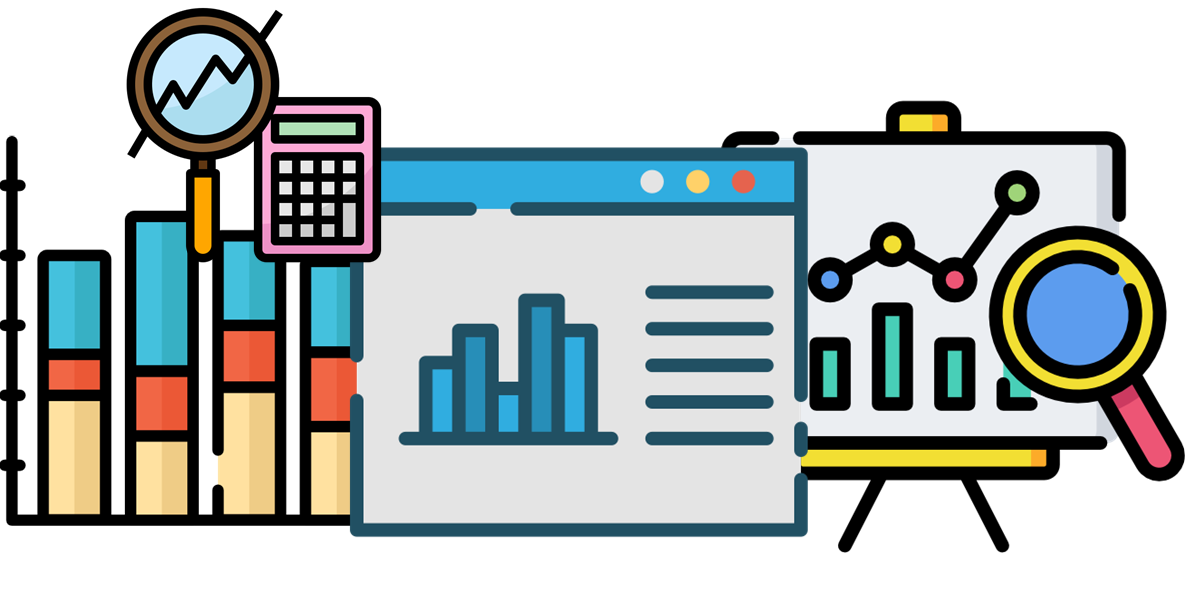
---


In our quest to unveil the hidden insights within our dataset, we embark on a journey known as Exploratory Data Analysis (EDA). This crucial phase allows us to understand, visualize, and draw preliminary conclusions from our data before diving into modeling.

#### Data Exploration:¶
We begin by inspecting the dataset to comprehend its structure and contents. This involves checking the number of rows and columns, identifying variable types, and assessing the presence of missing data.

#### EDA
	- The main purpose of this is to investigate what’s given using objective techniques requiring no assumptions 
	- Features to be used for for categorical (nominal/ordinal) is histograms, density plot, bar plot
	- Features to be used for numerical (continuous) is box plot (also important for determining outliers 
    - Existing features can be examined under a closer scope on how they all relate (correlation metrics), this depends on the data given and how a story can best be told using pair plots, bubble plots and scatter plots
	- Data shapes, value ranges, central tendencies, correlations and class distribution is what EDA is designed for

In [5]:
# look at data statistics
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [6]:
# look at data statistics
df_train.columns

Index(['Unnamed: 0', 'time', 'Madrid_wind_speed', 'Valencia_wind_deg',
       'Bilbao_rain_1h', 'Valencia_wind_speed', 'Seville_humidity',
       'Madrid_humidity', 'Bilbao_clouds_all', 'Bilbao_wind_speed',
       'Seville_clouds_all', 'Bilbao_wind_deg', 'Barcelona_wind_speed',
       'Barcelona_wind_deg', 'Madrid_clouds_all', 'Seville_wind_speed',
       'Barcelona_rain_1h', 'Seville_pressure', 'Seville_rain_1h',
       'Bilbao_snow_3h', 'Barcelona_pressure', 'Seville_rain_3h',
       'Madrid_rain_1h', 'Barcelona_rain_3h', 'Valencia_snow_3h',
       'Madrid_weather_id', 'Barcelona_weather_id', 'Bilbao_pressure',
       'Seville_weather_id', 'Valencia_pressure', 'Seville_temp_max',
       'Madrid_pressure', 'Valencia_temp_max', 'Valencia_temp',
       'Bilbao_weather_id', 'Seville_temp', 'Valencia_humidity',
       'Valencia_temp_min', 'Barcelona_temp_max', 'Madrid_temp_max',
       'Barcelona_temp', 'Bilbao_temp_min', 'Bilbao_temp',
       'Barcelona_temp_min', 'Bilbao_temp_max', 'Sev

In [7]:
# look at data statistics
df_train.describe()

Unnamed: 0  Madrid_wind_speed  Bilbao_rain_1h  Valencia_wind_speed  \
count  8763.000000        8763.000000     8763.000000          8763.000000   
mean   4381.000000           2.425729        0.135753             2.586272   
std    2529.804538           1.850371        0.374901             2.411190   
min       0.000000           0.000000        0.000000             0.000000   
25%    2190.500000           1.000000        0.000000             1.000000   
50%    4381.000000           2.000000        0.000000             1.666667   
75%    6571.500000           3.333333        0.100000             3.666667   
max    8762.000000          13.000000        3.000000            52.000000   

       Seville_humidity  Madrid_humidity  Bilbao_clouds_all  \
count       8763.000000      8763.000000        8763.000000   
mean          62.658793        57.414717          43.469132   
std           22.621226        24.335396          32.551044   
min            8.333333         6.333333           0.000000   
25%           44.333333        36.333333          10.000000   
50%           65.666667        58.000000          45.000000   
75%           82.000000        78.666667          75.000000   
max          100.000000       100.000000         100.000000   

       Bilbao_wind_speed  Seville_clouds_all  Bilbao_wind_deg  ...  \
count        8763.000000         8763.000000      8763.000000  ...   
mean            1.850356           13.714748       158.957511  ...   
std             1.695888           24.272482       102.056299  ...   
min             0.000000            0.000000         0.000000  ...   
25%             0.666667            0.000000        73.333333  ...   
50%             1.000000            0.000000       147.000000  ...   
75%             2.666667           20.000000       234.000000  ...   
max            12.666667           97.333333       359.333333  ...   

       Madrid_temp_max  Barcelona_temp  Bilbao_temp_min  Bilbao_temp  \
count      8763.000000     8763.000000      8763.000000  8763.000000   
mean        289.540309      289.855459       285.017973   286.422929   
std           9.752047        6.528111         6.705672     6.818682   
min         264.983333      270.816667       264.483333   267.483333   
25%         282.150000      284.973443       280.085167   281.374167   
50%         288.116177      289.416667       284.816667   286.158333   
75%         296.816667      294.909000       289.816667   291.034167   
max         314.483333      307.316667       309.816667   310.710000   

       Barcelona_temp_min  Bilbao_temp_max  Seville_temp_min  Madrid_temp  \
count         8763.000000      8763.000000       8763.000000  8763.000000   
mean           288.447422       287.966027        291.633356   288.419439   
std              6.102593         7.105590          8.178220     9.346796   
min            269.483333       269.063000        270.150000   264.983333   
25%            284.150000       282.836776        285.816667   281.404281   
50%            288.150000       287.630000        290.816667   287.053333   
75%            292.966667       292.483333        297.150000   295.154667   
max            304.816667       317.966667        314.816667   313.133333   

       Madrid_temp_min  load_shortfall_3h  
count      8763.000000        8763.000000  
mean        287.202203       10673.857612  
std           9.206237        5218.046404  
min         264.983333       -6618.000000  
25%         280.299167        7390.333333  
50%         286.083333       11114.666667  
75%         293.884500       14498.166667  
max         310.383333       31904.000000  

[8 rows x 46 columns]

In [8]:
# look at data statistics
df_train.isnull().sum() #Check for null values

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [9]:
# look at data statistics
df_train.skew()

Unnamed: 0               0.000000
Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_

In [10]:
# look at data statistics
df_train.kurtosis()

Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

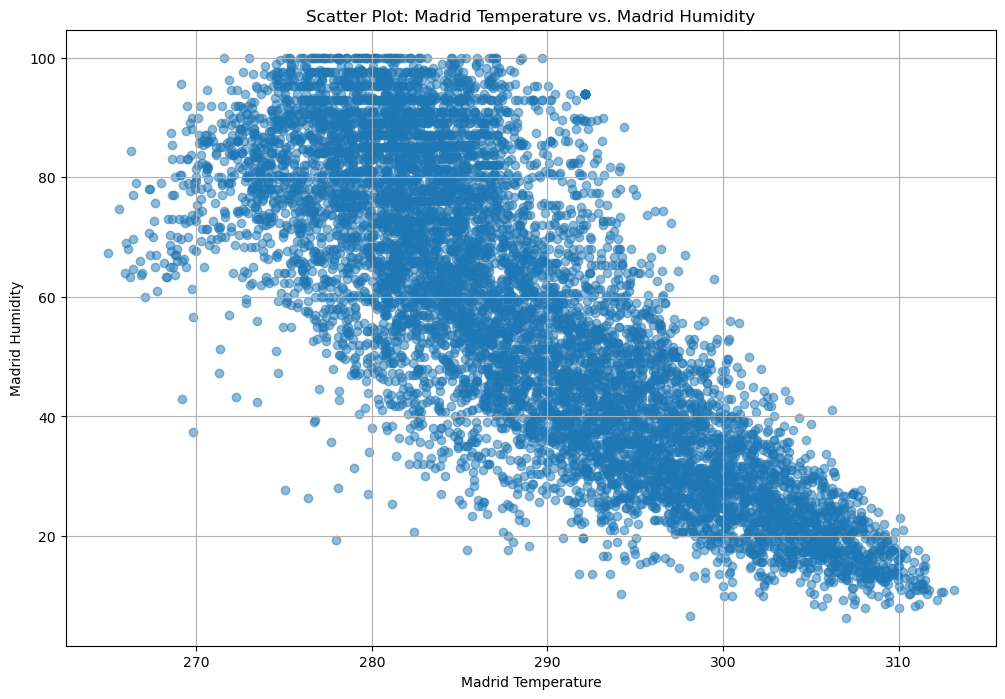

In [11]:
# plot relevant feature interactions
#Scatter plot of Madrid temperature vs. Madrid humidity
plt.figure(figsize=(12, 8))
plt.scatter(df_train['Madrid_temp'], df_train['Madrid_humidity'], alpha=0.5)
plt.title('Scatter Plot: Madrid Temperature vs. Madrid Humidity')
plt.xlabel('Madrid Temperature')
plt.ylabel('Madrid Humidity')
plt.grid(True)
plt.show()


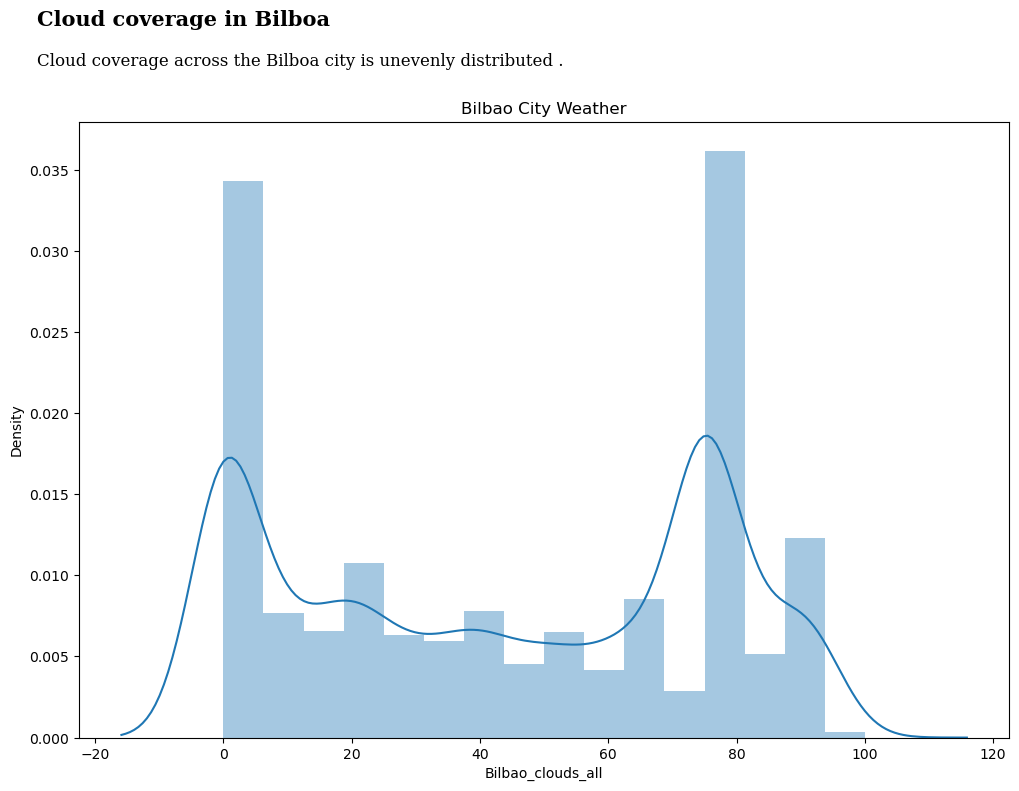

In [12]:
#Checking cloud coverage in Bilboa
fig = plt.figure(figsize=(12, 8))
sns.distplot(df_train['Bilbao_clouds_all'])
plt.title('Bilbao City Weather')
fig.text(0.09, 1, 'Cloud coverage in Bilboa', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Cloud coverage across the Bilboa city is unevenly distributed .', fontsize=12, fontweight='light', fontfamily='serif')
plt.show()

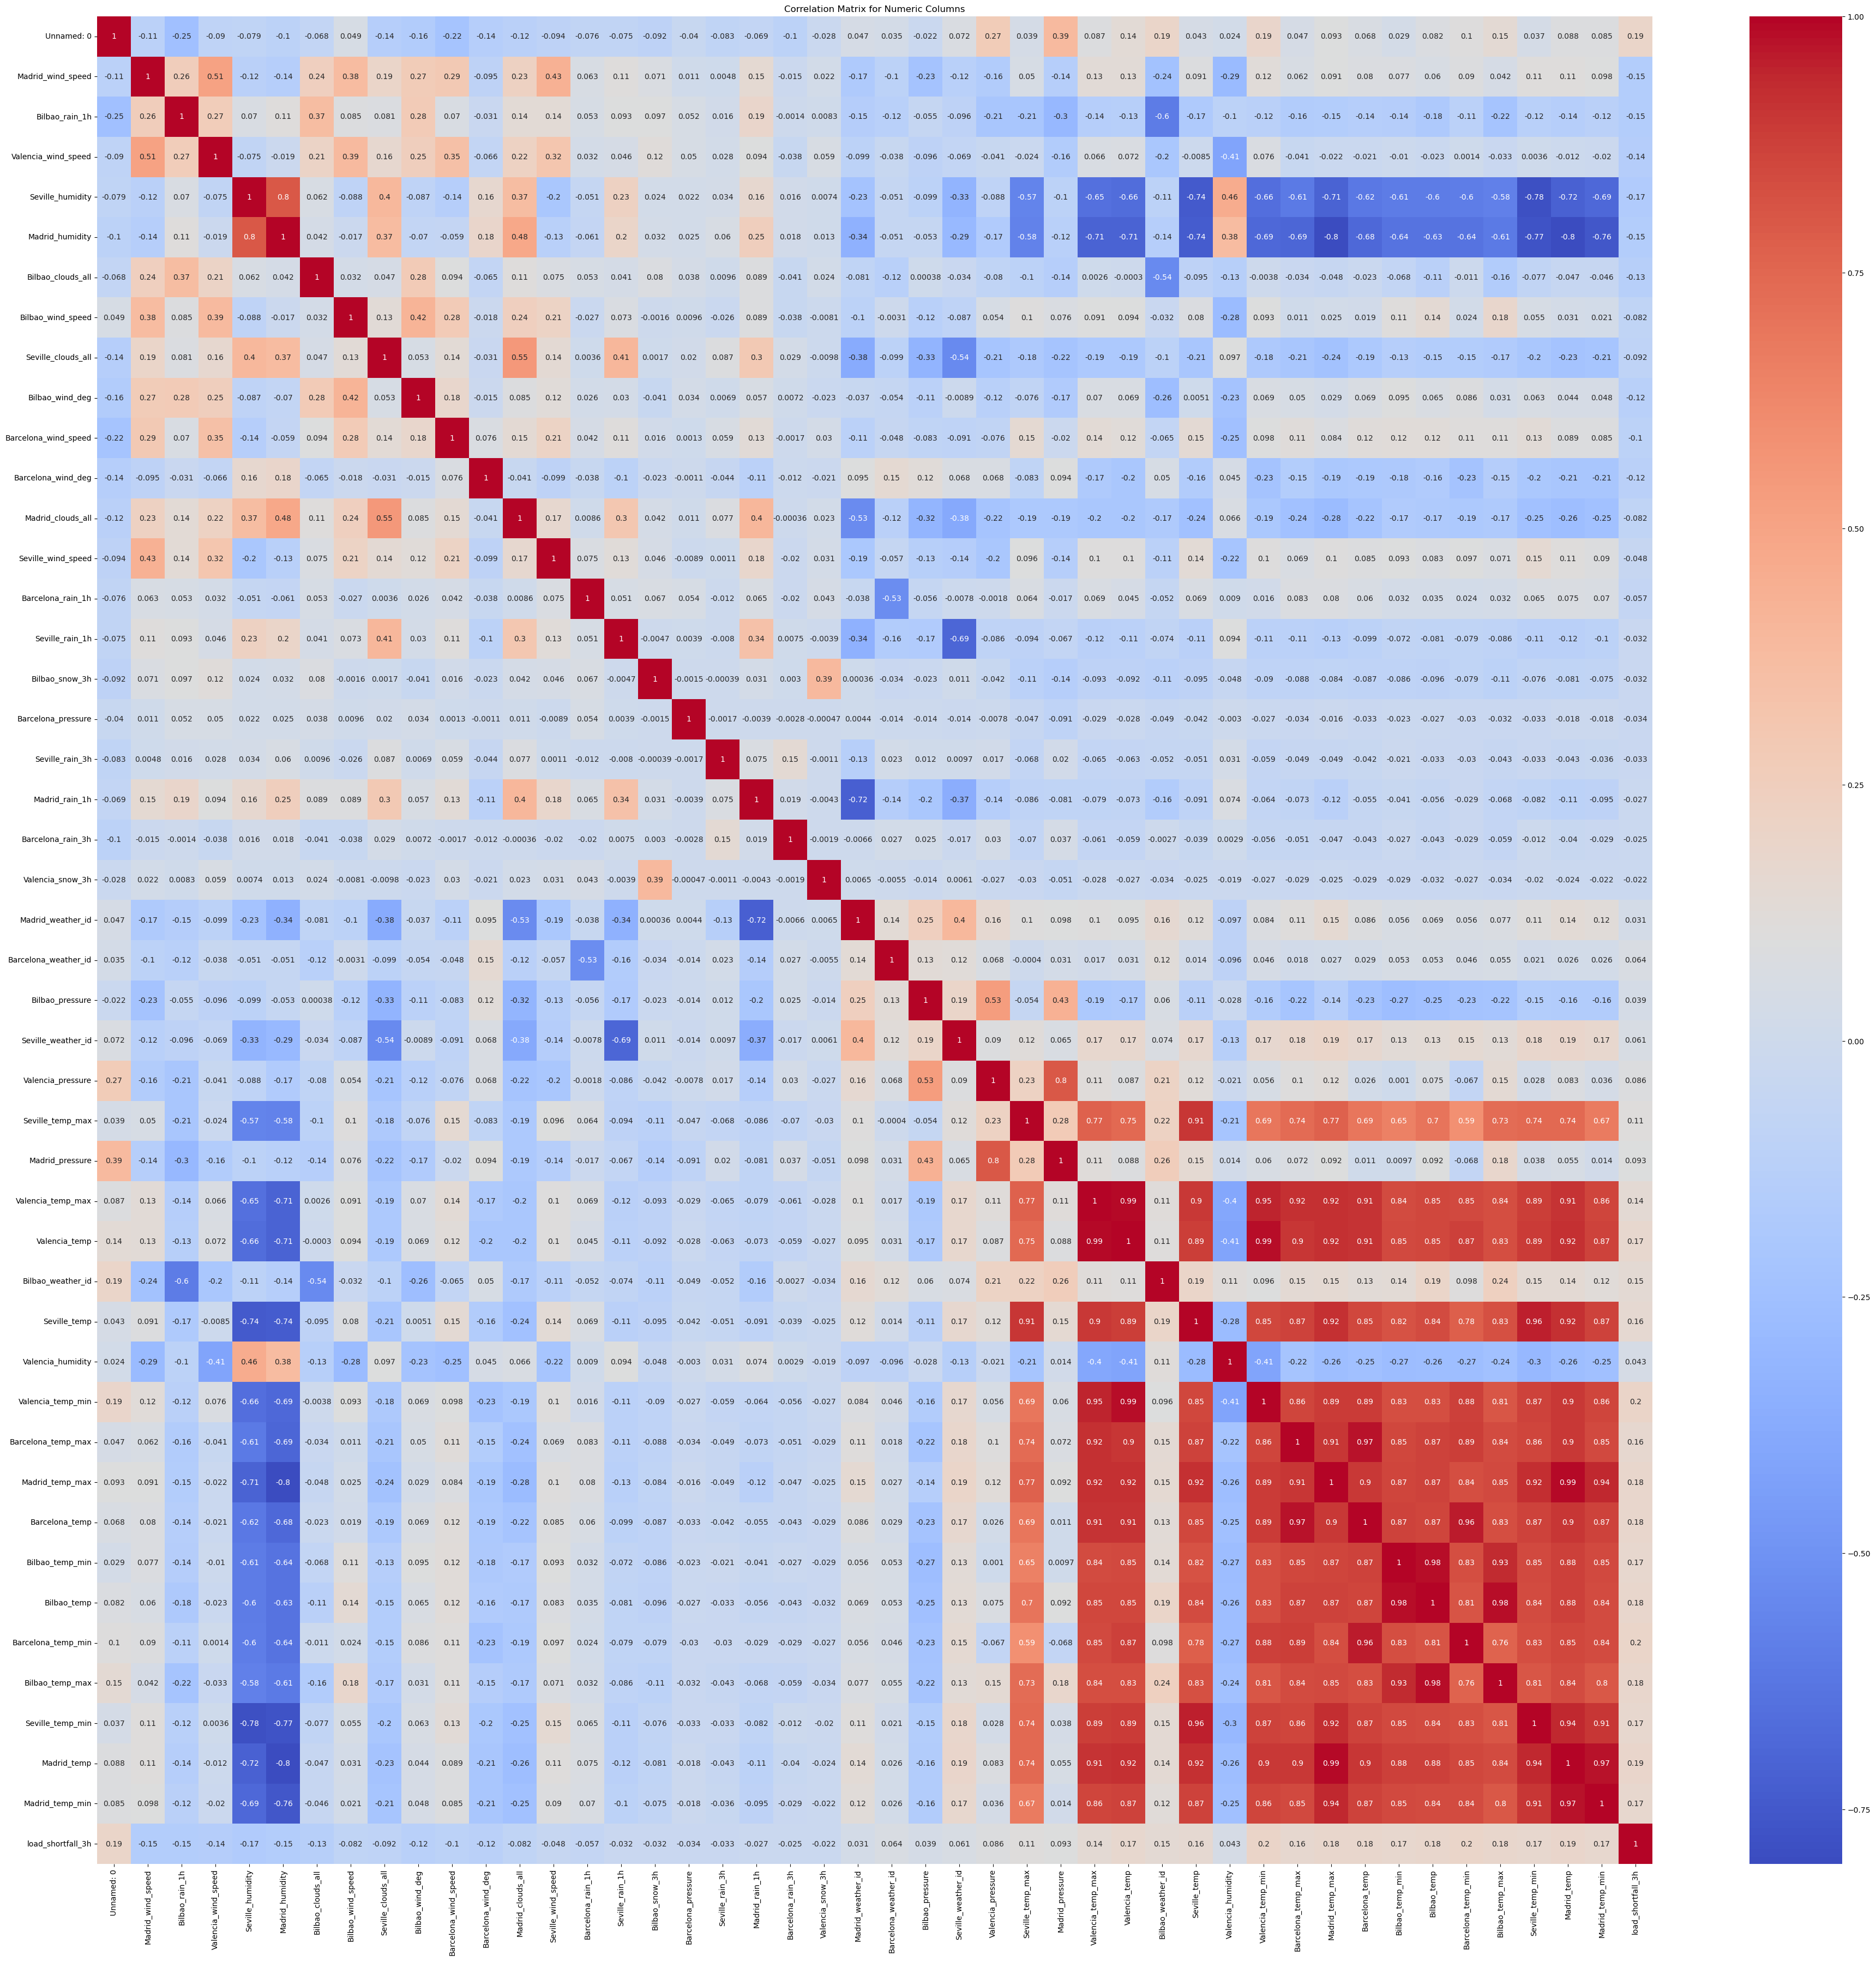

In [13]:
# evaluate correlation
numeric_columns = df_train.select_dtypes(include=[np.number]) # Select only numeric columns

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Visualize the correlation matrix
plt.figure(figsize=(46, 44))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Numeric Columns')
plt.show()

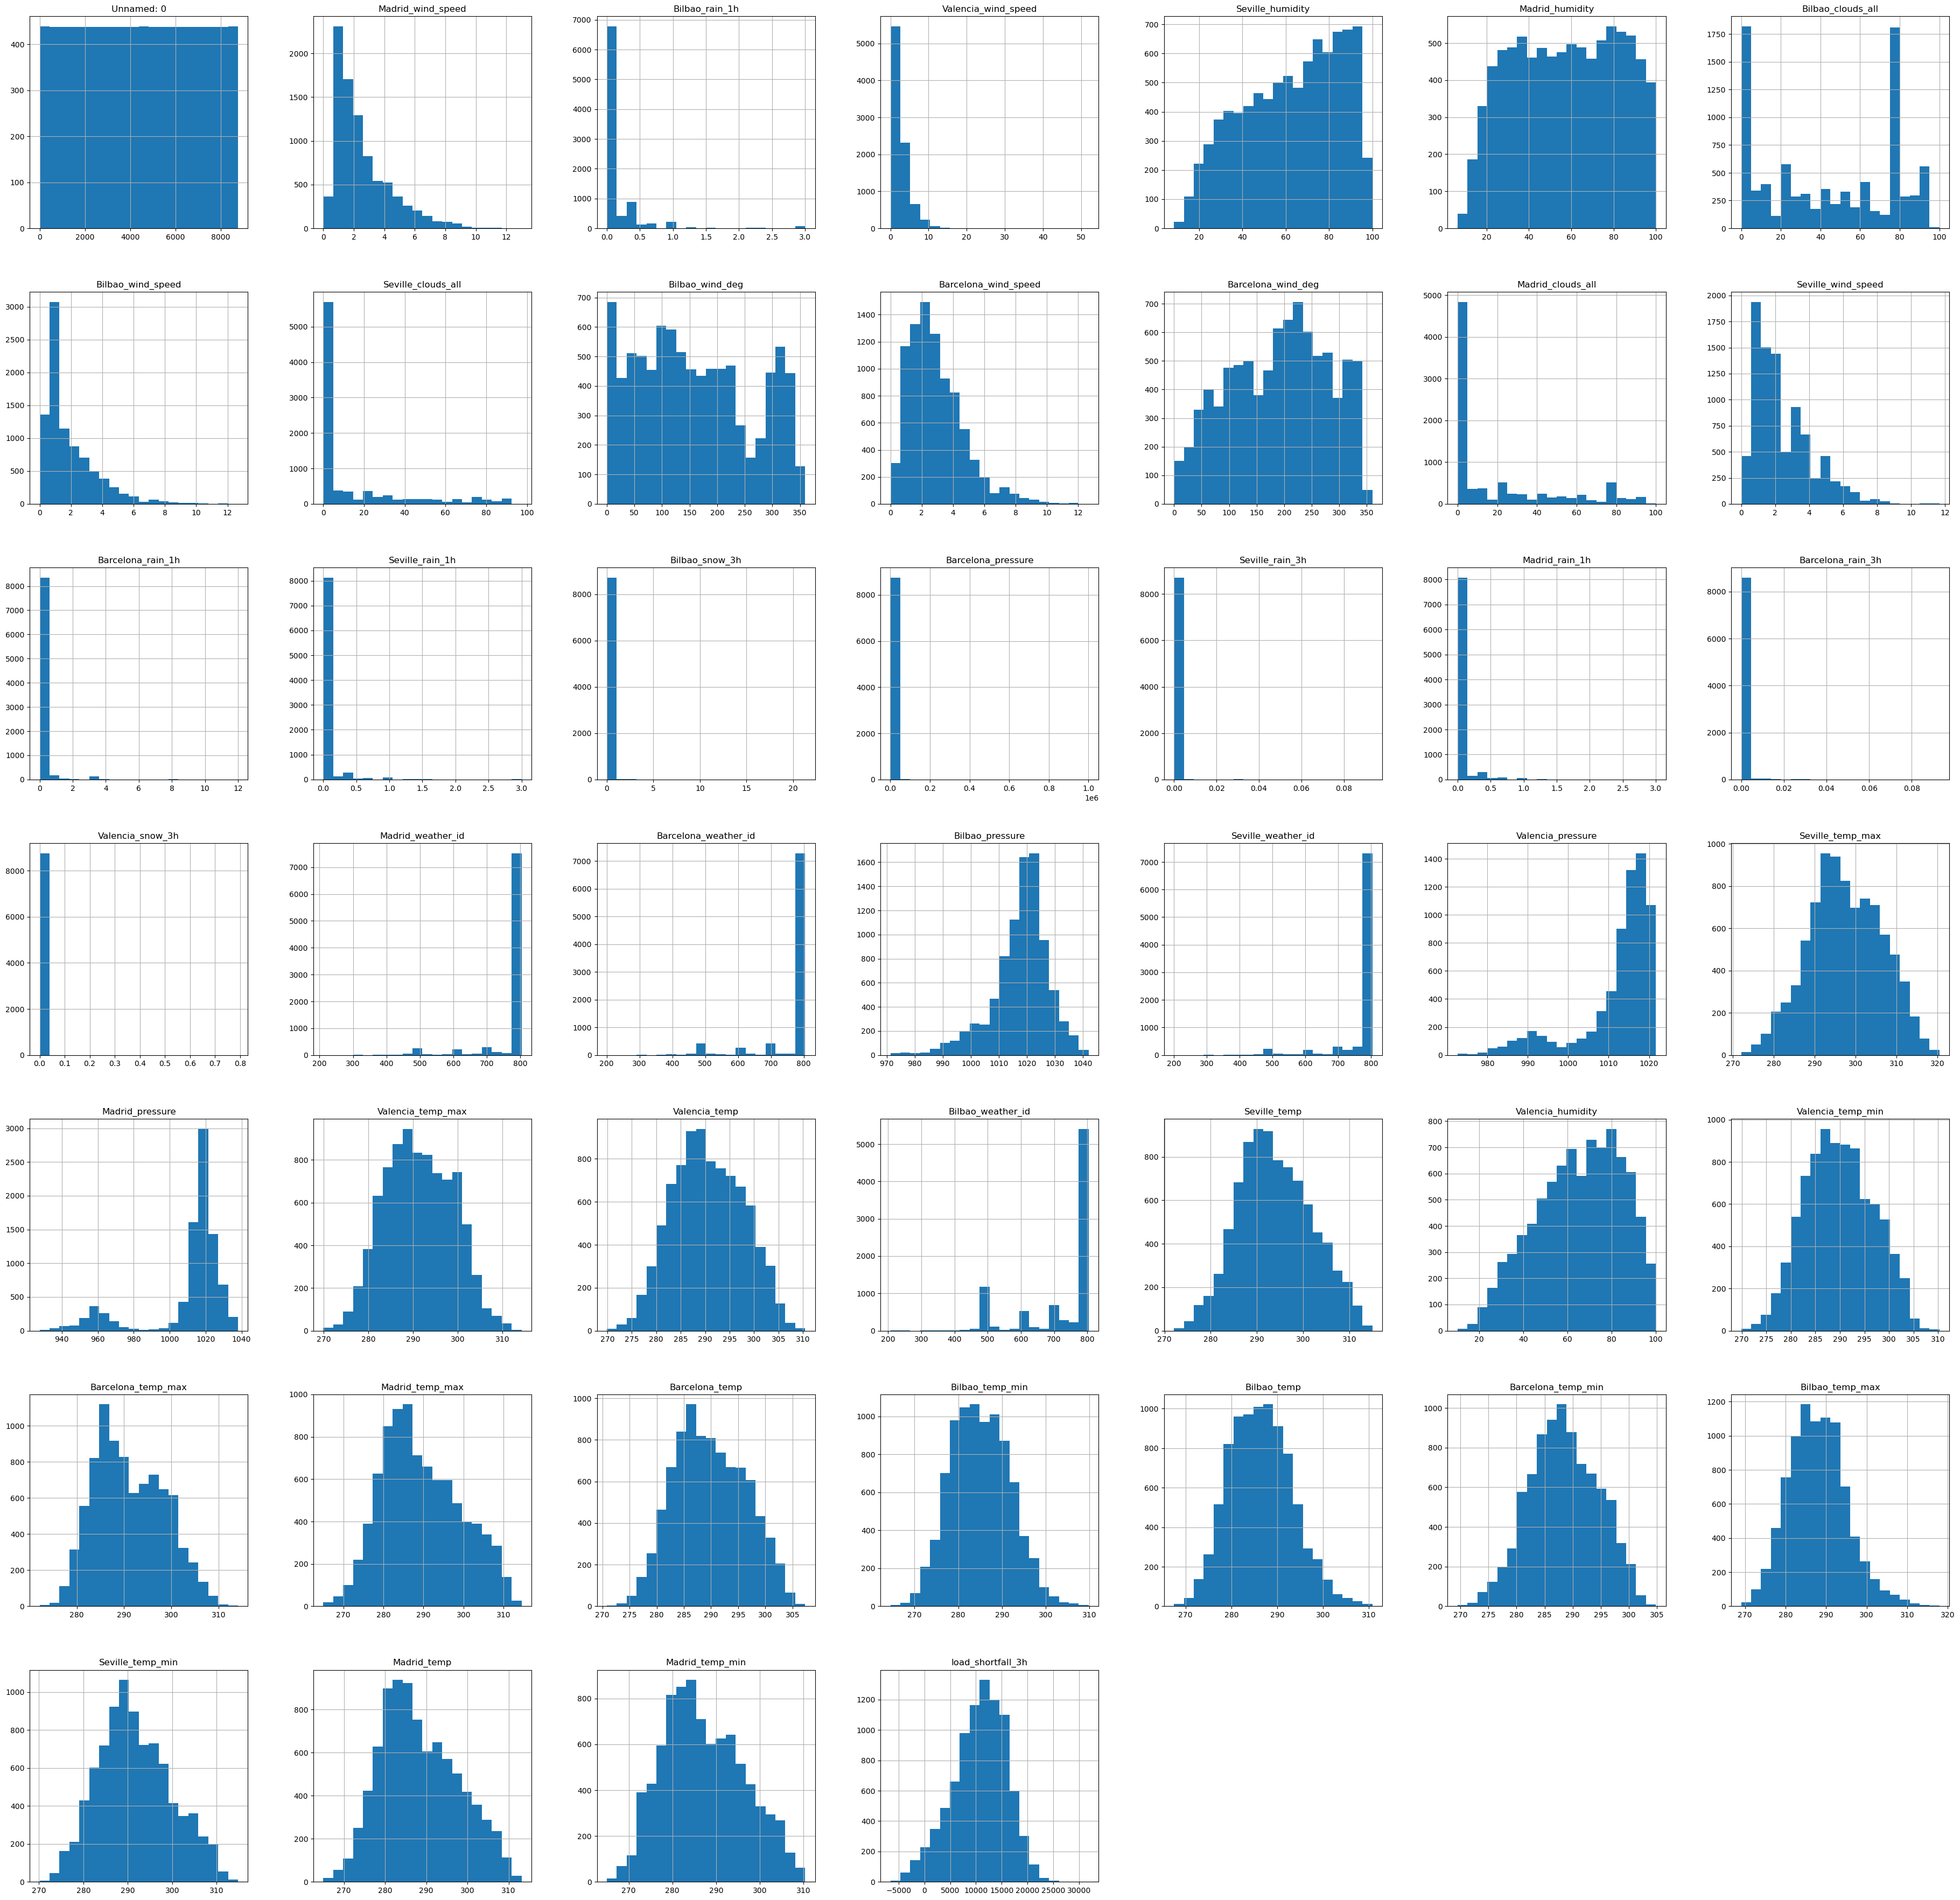

In [14]:
# have a look at feature distributions
df_train.hist(bins=20, figsize=(46, 45)) # Histograms for numerical columns
plt.show()

In [15]:
#Bar graph for average shortfall for different time periods
humidity_data = {
    'Valencia_humidity': df_train['Valencia_humidity'],
    #Humidity data for Barcelona and Bilbao is not int he database
    'Madrid_humidity': df_train['Madrid_humidity']
}

df_humidity = pd.DataFrame(humidity_data)

# Aggregate the averages in humidities of each all cities and create a new 'Average_humidity' column
df_humidity['Average_Humidity'] = df_humidity.mean(axis=1)

#Median tempaerature in Spain 
median_humidity_in_Spain = np.median(df_humidity.Average_Humidity)
print("Median humidity in Spain: ", median_humidity_in_Spain)

Median humidity in Spain:  61.166666666699996


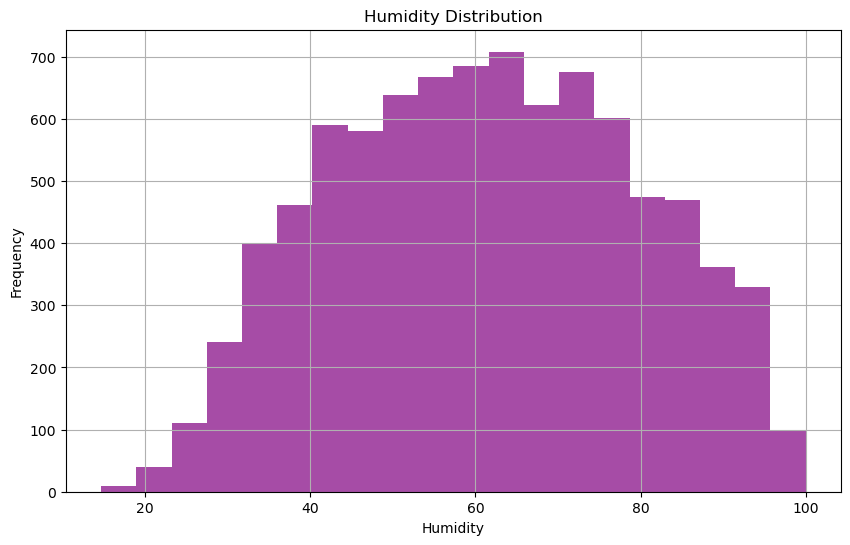

In [16]:
# Create a histogram to see Humidity distribution 
plt.figure(figsize=(10, 6))
plt.hist(df_humidity.Average_Humidity, bins=20, color='purple', alpha=0.7)
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.title('Humidity Distribution')
plt.grid(True)
plt.show()

In [17]:
#Average wind speeds in Spain
wind_speed_data = {
    'Valencia_wind_speed': df_train['Valencia_wind_speed'],
    'Barcelona_wind_speed': df_train['Barcelona_wind_speed'],
    'Bilbao_wind_speed': df_train['Bilbao_wind_speed'],
    'Madrid_wind_speed': df_train['Madrid_wind_speed']
}

df_wind_speed = pd.DataFrame(wind_speed_data)

#Aggregate the wind speeds of all cities to create a new column
df_wind_speed['Average_wind_speeds'] = df_wind_speed.mean(axis=1)

#Median wind speed in Spain 
median_wind_in_Spain = np.median(df_wind_speed.Average_wind_speeds)
print("Median Wind speed in Spain: ", median_wind_in_Spain)

Median Wind speed in Spain:  2.083333333325


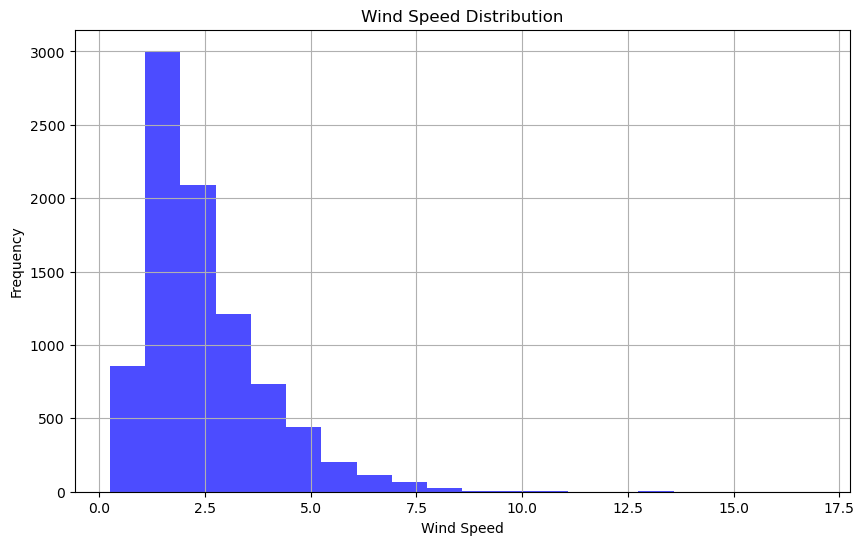

In [18]:
# Create a histogram to see wind speed distribution to see wind speed distribution
plt.figure(figsize=(10, 6))
plt.hist(df_wind_speed.Average_wind_speeds, bins=20, color='blue', alpha=0.7)
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.title('Wind Speed Distribution')
plt.grid(True)
plt.show()

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |
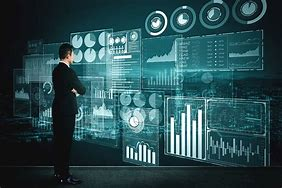
---

In the quest for modeling excellence, data engineering serves as the workshop where we refine our raw materials.The EDA phase has already provided us with a roadmap, pointing out areas that require attention. In this section, we will roll up our sleeves and transform our dataset into a clean, well-prepared canvas for modeling.

### Cleaning the dataset 
    - Make sure all data types are valid 
	- Make sure there’s no null values , remove corrupt values 
	- Correct date formatting 
	- Name files appropriately

In [19]:
#Combine two datasets together
df=pd.concat((df_train,df_test))
df.head()

Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  \
0           0  2015-01-01 03:00:00           0.666667           level_5   
1           1  2015-01-01 06:00:00           0.333333          level_10   
2           2  2015-01-01 09:00:00           1.000000           level_9   
3           3  2015-01-01 12:00:00           1.000000           level_8   
4           4  2015-01-01 15:00:00           1.000000           level_7   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             0.666667         74.333333        64.000000   
1             0.0             1.666667         78.333333        64.666667   
2             0.0             1.000000         71.333333        64.333333   
3             0.0             1.000000         65.333333        56.333333   
4             0.0             1.000000         59.000000        57.000000   

   Bilbao_clouds_all  Bilbao_wind_speed  ...  Madrid_temp_max  Barcelona_temp  \
0                0.0           1.000000  ...       265.938000      281.013000   
1                0.0           1.000000  ...       266.386667      280.561667   
2                0.0           1.000000  ...       272.708667      281.583667   
3                0.0           1.000000  ...       281.895219      283.434104   
4                2.0           0.333333  ...       280.678437      284.213167   

   Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  \
0       269.338615   269.338615          281.013000       269.338615   
1       270.376000   270.376000          280.561667       270.376000   
2       275.027229   275.027229          281.583667       275.027229   
3       281.135063   281.135063          283.434104       281.135063   
4       282.252063   282.252063          284.213167       282.252063   

   Seville_temp_min Madrid_temp  Madrid_temp_min  load_shortfall_3h  
0        274.254667  265.938000       265.938000        6715.666667  
1        274.945000  266.386667       266.386667        4171.666667  
2        278.792000  272.708667       272.708667        4274.666667  
3        285.394000  281.895219       281.895219        5075.666667  
4        285.513719  280.678437       280.678437        6620.666667  

[5 rows x 49 columns]

In [20]:
df.shape

(11683, 49)

In [21]:
# remove missing values/ features
df.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2522
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

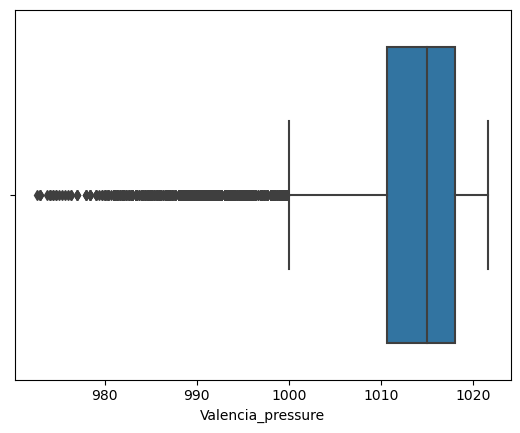

In [22]:
sns.boxplot(x='Valencia_pressure', data=df);

In [23]:
print ('Mode')
print (df['Valencia_pressure'].mode())
print ('Mean')
print (df['Valencia_pressure'].mean())
print ('Median')
print (df['Valencia_pressure'].median())

Mode
0    1018.0
Name: Valencia_pressure, dtype: float64
Mean
1012.3466870428987
Median
1015.0


In [24]:
df_clean = df
df_clean['Valencia_pressure']=df_clean['Valencia_pressure'].fillna(df_clean['Valencia_pressure']).mode()[0]

In [25]:
df_clean.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure          0
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

In [26]:
#Checking data types
df_clean.dtypes

Unnamed: 0                int64
time                     object
Madrid_wind_speed       float64
Valencia_wind_deg        object
Bilbao_rain_1h          float64
Valencia_wind_speed     float64
Seville_humidity        float64
Madrid_humidity         float64
Bilbao_clouds_all       float64
Bilbao_wind_speed       float64
Seville_clouds_all      float64
Bilbao_wind_deg         float64
Barcelona_wind_speed    float64
Barcelona_wind_deg      float64
Madrid_clouds_all       float64
Seville_wind_speed      float64
Barcelona_rain_1h       float64
Seville_pressure         object
Seville_rain_1h         float64
Bilbao_snow_3h          float64
Barcelona_pressure      float64
Seville_rain_3h         float64
Madrid_rain_1h          float64
Barcelona_rain_3h       float64
Valencia_snow_3h        float64
Madrid_weather_id       float64
Barcelona_weather_id    float64
Bilbao_pressure         float64
Seville_weather_id      float64
Valencia_pressure       float64
Seville_temp_max        float64
Madrid_p

In [27]:
#Changing time to numeric
df_clean['time']

0       2015-01-01 03:00:00
1       2015-01-01 06:00:00
2       2015-01-01 09:00:00
3       2015-01-01 12:00:00
4       2015-01-01 15:00:00
               ...         
2915    2018-12-31 09:00:00
2916    2018-12-31 12:00:00
2917    2018-12-31 15:00:00
2918    2018-12-31 18:00:00
2919    2018-12-31 21:00:00
Name: time, Length: 11683, dtype: object

In [28]:
#COVERT TIME TO SERIES TIME
df_clean['time'] = pd.to_datetime(df_clean['time'])
df_clean.time

0      2015-01-01 03:00:00
1      2015-01-01 06:00:00
2      2015-01-01 09:00:00
3      2015-01-01 12:00:00
4      2015-01-01 15:00:00
               ...        
2915   2018-12-31 09:00:00
2916   2018-12-31 12:00:00
2917   2018-12-31 15:00:00
2918   2018-12-31 18:00:00
2919   2018-12-31 21:00:00
Name: time, Length: 11683, dtype: datetime64[ns]

In [29]:
#Changing Valencia_wind_deg from object to numeric
df_clean['Valencia_wind_deg'] 

0        level_5
1       level_10
2        level_9
3        level_8
4        level_7
          ...   
2915     level_9
2916     level_8
2917     level_6
2918     level_6
2919    level_10
Name: Valencia_wind_deg, Length: 11683, dtype: object

In [30]:
df_clean['Valencia_wind_deg'] = df_clean['Valencia_wind_deg'].str.extract('(\d+)')
df_clean['Valencia_wind_deg'] = pd.to_numeric(df_clean['Valencia_wind_deg'])
df_clean['Valencia_wind_deg']

0        5
1       10
2        9
3        8
4        7
        ..
2915     9
2916     8
2917     6
2918     6
2919    10
Name: Valencia_wind_deg, Length: 11683, dtype: int64

In [31]:
#Changing Valencia_wind_deg from object to numeric
df_clean['Seville_pressure'] = df_clean['Seville_pressure'].str.extract('(\d+)')
df_clean['Seville_pressure'] = pd.to_numeric(df_clean['Seville_pressure'])
df_clean['Seville_pressure']

0       25
1       25
2       25
3       25
4       25
        ..
2915    24
2916    24
2917    23
2918    23
2919    23
Name: Seville_pressure, Length: 11683, dtype: int64

In [32]:
# create new features
#adding new feature for time to be usable in numeric
df_clean['Day'] = df_clean ['time'].dt.day
df_clean['Month'] = df_clean ['time'].dt.month
df_clean['Year'] = df_clean ['time'].dt.year
df_clean['Hour'] = df_clean ['time'].dt.hour
df_clean['Start_minute'] = df_clean ['time'].dt.minute
df_clean['start_seconds'] = df_clean ['time'].dt.second
df_clean['Start_weekend'] = df_clean ['time'].dt.weekday
df_clean['Start_week_of_year'] = df_clean ['time'].dt.isocalendar().week

df_clean.head()

Unnamed: 0                time  Madrid_wind_speed  Valencia_wind_deg  \
0           0 2015-01-01 03:00:00           0.666667                  5   
1           1 2015-01-01 06:00:00           0.333333                 10   
2           2 2015-01-01 09:00:00           1.000000                  9   
3           3 2015-01-01 12:00:00           1.000000                  8   
4           4 2015-01-01 15:00:00           1.000000                  7   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             0.666667         74.333333        64.000000   
1             0.0             1.666667         78.333333        64.666667   
2             0.0             1.000000         71.333333        64.333333   
3             0.0             1.000000         65.333333        56.333333   
4             0.0             1.000000         59.000000        57.000000   

   Bilbao_clouds_all  Bilbao_wind_speed  ...  Madrid_temp_min  \
0                0.0           1.000000  ...       265.938000   
1                0.0           1.000000  ...       266.386667   
2                0.0           1.000000  ...       272.708667   
3                0.0           1.000000  ...       281.895219   
4                2.0           0.333333  ...       280.678437   

   load_shortfall_3h  Day  Month  Year  Hour  Start_minute  start_seconds  \
0        6715.666667    1      1  2015     3             0              0   
1        4171.666667    1      1  2015     6             0              0   
2        4274.666667    1      1  2015     9             0              0   
3        5075.666667    1      1  2015    12             0              0   
4        6620.666667    1      1  2015    15             0              0   

   Start_weekend  Start_week_of_year  
0              3                   1  
1              3                   1  
2              3                   1  
3              3                   1  
4              3                   1  

[5 rows x 57 columns]

In [33]:
#Adding seasons as new feature
df_clean.loc[df_clean['Month'].isin([1, 2, 3]), ['winter', 'spring', 'summer', 'autumn']] = [1, 0, 0, 0]
df_clean.loc[df_clean['Month'].isin([4, 5, 6]), ['winter', 'spring', 'summer', 'autumn']] = [0, 1, 0, 0]
df_clean.loc[df_clean['Month'].isin([7, 8, 9]), ['winter', 'spring', 'summer', 'autumn']] = [0, 0, 1, 0]
df_clean.loc[df_clean['Month'].isin([10, 11, 12]), ['winter', 'spring', 'summer', 'autumn']] = [0, 0, 0, 1]

df_clean = df_clean.astype({
    'winter': int, 'summer': int, 'spring': int, 'autumn': int
})

In [34]:
## Dropping the index column 
df_clean = df_clean.drop(['Unnamed: 0', 'time'], axis = 1)

In [35]:
df_clean.dtypes

Madrid_wind_speed       float64
Valencia_wind_deg         int64
Bilbao_rain_1h          float64
Valencia_wind_speed     float64
Seville_humidity        float64
Madrid_humidity         float64
Bilbao_clouds_all       float64
Bilbao_wind_speed       float64
Seville_clouds_all      float64
Bilbao_wind_deg         float64
Barcelona_wind_speed    float64
Barcelona_wind_deg      float64
Madrid_clouds_all       float64
Seville_wind_speed      float64
Barcelona_rain_1h       float64
Seville_pressure          int64
Seville_rain_1h         float64
Bilbao_snow_3h          float64
Barcelona_pressure      float64
Seville_rain_3h         float64
Madrid_rain_1h          float64
Barcelona_rain_3h       float64
Valencia_snow_3h        float64
Madrid_weather_id       float64
Barcelona_weather_id    float64
Bilbao_pressure         float64
Seville_weather_id      float64
Valencia_pressure       float64
Seville_temp_max        float64
Madrid_pressure         float64
Valencia_temp_max       float64
Valencia

In [36]:
#dropping Bilbao and Valencia snow as they have not entry
df_clean.drop(['Bilbao_snow_3h', 'Valencia_snow_3h'], axis=1)

Madrid_wind_speed  Valencia_wind_deg  Bilbao_rain_1h  \
0              0.666667                  5             0.0   
1              0.333333                 10             0.0   
2              1.000000                  9             0.0   
3              1.000000                  8             0.0   
4              1.000000                  7             0.0   
...                 ...                ...             ...   
2915           0.333333                  9             0.0   
2916           0.333333                  8             0.0   
2917           1.000000                  6             0.0   
2918           1.000000                  6             0.0   
2919           1.333333                 10             0.0   

      Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0                0.666667         74.333333        64.000000   
1                1.666667         78.333333        64.666667   
2                1.000000         71.333333        64.333333   
3                1.000000         65.333333        56.333333   
4                1.000000         59.000000        57.000000   
...                   ...               ...              ...   
2915             2.000000         81.666667        49.666667   
2916             1.333333         61.000000        28.333333   
2917             3.000000         47.000000        26.333333   
2918             2.000000         52.666667        56.666667   
2919             2.333333         61.666667        69.333333   

      Bilbao_clouds_all  Bilbao_wind_speed  Seville_clouds_all  \
0              0.000000           1.000000                 0.0   
1              0.000000           1.000000                 0.0   
2              0.000000           1.000000                 0.0   
3              0.000000           1.000000                 0.0   
4              2.000000           0.333333                 0.0   
...                 ...                ...                 ...   
2915          80.000000           1.333333                 0.0   
2916          56.666667           1.000000                 0.0   
2917           0.000000           0.666667                 0.0   
2918           0.000000           0.666667                 0.0   
2919           0.000000           1.333333                 0.0   

      Bilbao_wind_deg  ...  Year  Hour  Start_minute  start_seconds  \
0          223.333333  ...  2015     3             0              0   
1          221.000000  ...  2015     6             0              0   
2          214.333333  ...  2015     9             0              0   
3          199.666667  ...  2015    12             0              0   
4          185.000000  ...  2015    15             0              0   
...               ...  ...   ...   ...           ...            ...   
2915        70.000000  ...  2018     9             0              0   
2916        36.666667  ...  2018    12             0              0   
2917        14.666667  ...  2018    15             0              0   
2918        19.000000  ...  2018    18             0              0   
2919       120.000000  ...  2018    21             0              0   

      Start_weekend  Start_week_of_year  winter  spring  summer  autumn  
0                 3                   1       1       0       0       0  
1                 3                   1       1       0       0       0  
2                 3                   1       1       0       0       0  
3                 3                   1       1       0       0       0  
4                 3                   1       1       0       0       0  
...             ...                 ...     ...     ...     ...     ...  
2915              0                   1       0       0       0       1  
2916              0                   1       0       0       0       1  
2917              0                   1       0       0       0       1  
2918              0                   1       0       0       0       1  
2919              0             

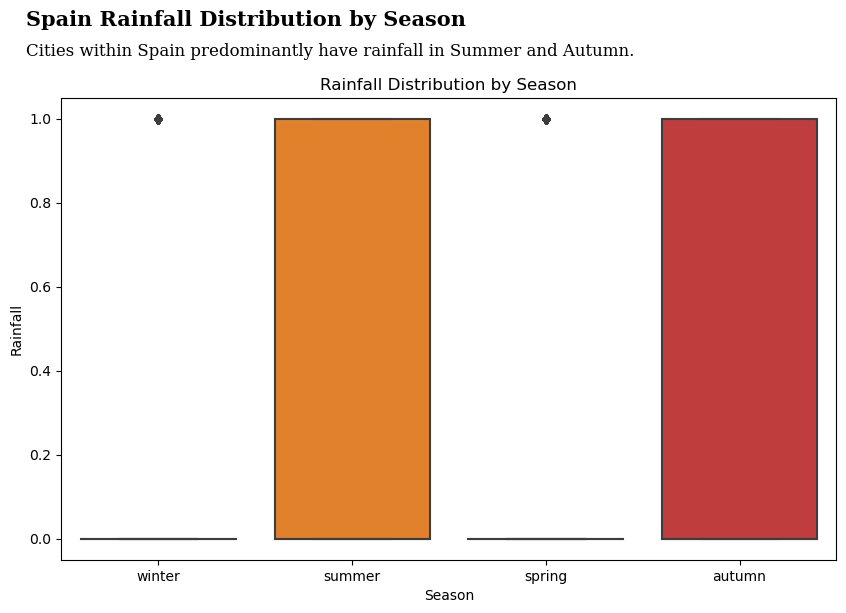

In [38]:
fig, ax = plt.subplots(figsize=(10, 6))

# Reshape the data for the distribution plot
seasonal_data = df_clean.melt(id_vars=['Year'], value_vars=['winter', 'summer', 'spring', 'autumn'],
                                      var_name='Season', value_name='Rainfall')

# Create the distribution plot
sns.boxplot(x='Season', y='Rainfall', data=seasonal_data, ax=ax)

# Customize labels and title
ax.set_xlabel('Season')
ax.set_ylabel('Rainfall')
plt.title('Rainfall Distribution by Season')

# Add text to the figure
fig.text(0.09, 1, 'Spain Rainfall Distribution by Season', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Cities within Spain predominantly have rainfall in Summer and Autumn.', fontsize=12, fontweight='light', fontfamily='serif')

# Show the plot
plt.show()

In [39]:
# engineer existing features

# Average Load Shortfall in the morning(Between 6am and 12 pm):
df['time'] = pd.to_datetime(df['time']) # Convert time column into datetime data type
#Only morning shortfall
morning_shortfall = df[(df['time'].dt.time >= pd.to_datetime('06:00:00').time()) & 
                   (df['time'].dt.time <= pd.to_datetime('12:00:00').time())]
mean_morning_shortfall = morning_shortfall['load_shortfall_3h'].mean()
print("Average load shortfall in the morning: ", mean_morning_shortfall)

# Average Load Shortfall in the afternoon(Between 12pm and 6pm):
df['time'] = pd.to_datetime(df['time']) # Convert time column into datetime data type
#Only afternoon shortfall
afternoon_shortfall = df[(df['time'].dt.time >= pd.to_datetime('12:00:00').time()) & 
                   (df['time'].dt.time <= pd.to_datetime('17:00:00').time())]
mean_afternoon_shortfall = afternoon_shortfall['load_shortfall_3h'].mean()
print("Average load shortfall in the afternoon: ", mean_afternoon_shortfall)

# Average Load Shortfall in the evening(Between 6pm and 9pm):
df['time'] = pd.to_datetime(df['time']) # Convert time column into datetime data type
#Only evening shortfall
evening_shortfall = df[(df['time'].dt.time >= pd.to_datetime('18:00:00').time()) & 
                   (df['time'].dt.time <= pd.to_datetime('21:00:00').time())]
mean_evening_shortfall = evening_shortfall['load_shortfall_3h'].mean()
print("Average load shortfall in the evening: ", mean_evening_shortfall)

# Average Load Shortfall in the night(Between 9pm and 6am):
df['time'] = pd.to_datetime(df['time']) # Convert time column into datetime data type
#Only night shortfall
night_shortfall = df[(df['time'].dt.time >= pd.to_datetime('06:00:00').time()) & 
                   (df['time'].dt.time <= pd.to_datetime('21:00:00').time())]
mean_night_shortfall = night_shortfall['load_shortfall_3h'].mean()
print("Average load shortfall in the night: ", mean_night_shortfall)

Average load shortfall in the morning:  9843.421634225466
Average load shortfall in the afternoon:  12017.565525114156
Average load shortfall in the evening:  11554.366438356165
Average load shortfall in the night:  10723.066798539257


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |
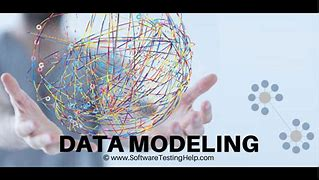
---

With our data well-prepared and our insights honed, we are now at the doorstep of predictive modeling. In this phase, we'll harness the power of regression models to forecast the three-hour load shortfall – a pivotal piece of the puzzle in maintaining a stable energy grid.

The goal is clear: we aim to build one or more regression models that are not just capable but accurate. These models will utilize the patterns and relationships we've uncovered in our data to make precise predictions about electricity shortfalls.

Our toolkit includes regression algorithms like Linear Regression, Random Forest Regression, and Support Vector Regression. We'll experiment with these models, fine-tuning their parameters, and evaluating their performance using metrics like Mean Squared Error (MSE) and R-squared (R²).

With modeling, we bridge the gap between data and insights, turning numbers into actionable information. Let's embark on this journey to create models that will help us navigate the complexities of Spain's energy landscape.


#### Split the Data: 
- divide our dataset into two parts: one for training the models and another for testing their performance.
- it is to ensure that our models can generalize well to unseen data.

In [40]:
# split data
y = df_clean[:len(df_train)][['load_shortfall_3h']]
x = df_clean[:len(df_train)].drop('load_shortfall_3h', axis = 1)

In [41]:
x.head()

Madrid_wind_speed  Valencia_wind_deg  Bilbao_rain_1h  Valencia_wind_speed  \
0           0.666667                  5             0.0             0.666667   
1           0.333333                 10             0.0             1.666667   
2           1.000000                  9             0.0             1.000000   
3           1.000000                  8             0.0             1.000000   
4           1.000000                  7             0.0             1.000000   

   Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  \
0         74.333333        64.000000                0.0           1.000000   
1         78.333333        64.666667                0.0           1.000000   
2         71.333333        64.333333                0.0           1.000000   
3         65.333333        56.333333                0.0           1.000000   
4         59.000000        57.000000                2.0           0.333333   

   Seville_clouds_all  Bilbao_wind_deg  ...  Year  Hour  Start_minute  \
0                 0.0       223.333333  ...  2015     3             0   
1                 0.0       221.000000  ...  2015     6             0   
2                 0.0       214.333333  ...  2015     9             0   
3                 0.0       199.666667  ...  2015    12             0   
4                 0.0       185.000000  ...  2015    15             0   

   start_seconds  Start_weekend  Start_week_of_year  winter  spring  summer  \
0              0              3                   1       1       0       0   
1              0              3                   1       1       0       0   
2              0              3                   1       1       0       0   
3              0              3                   1       1       0       0   
4              0              3                   1       1       0       0   

   autumn  
0       0  
1       0  
2       0  
3       0  
4       0  

[5 rows x 58 columns]

In [42]:
y.head()

load_shortfall_3h
0        6715.666667
1        4171.666667
2        4274.666667
3        5075.666667
4        6620.666667

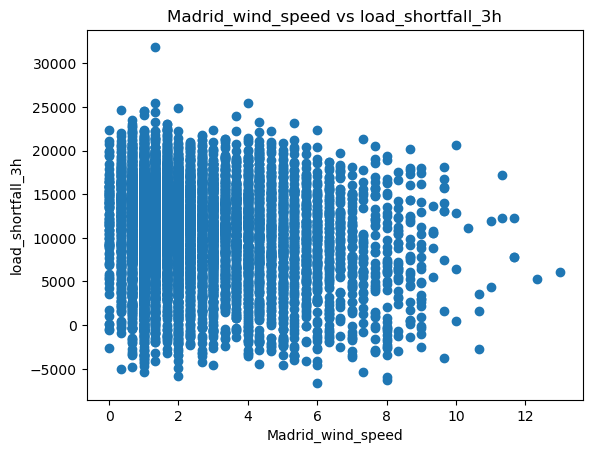

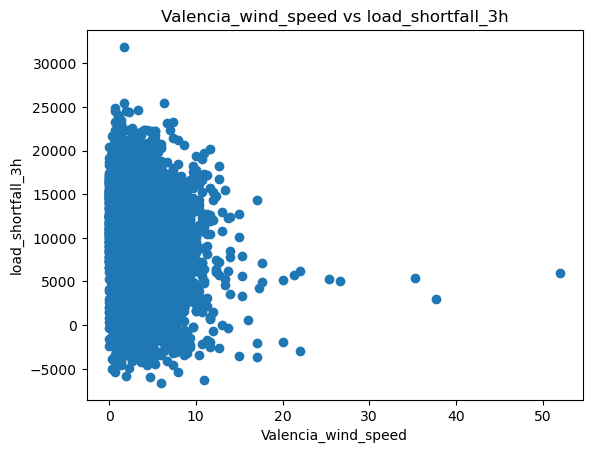

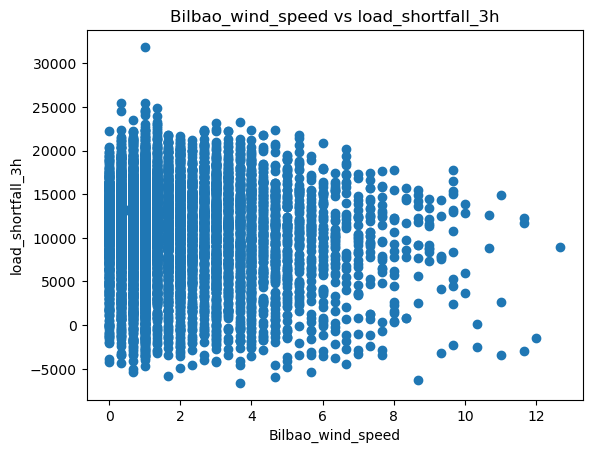

In [43]:
plt.scatter(x['Madrid_wind_speed'],y) # create scatter plot
plt.title("Madrid_wind_speed vs load_shortfall_3h")
plt.xlabel('Madrid_wind_speed')
plt.ylabel("load_shortfall_3h")
plt.show()

plt.scatter(x['Valencia_wind_speed'],y) # create scatter plot
plt.title("Valencia_wind_speed vs load_shortfall_3h")
plt.xlabel('Valencia_wind_speed')
plt.ylabel("load_shortfall_3h")
plt.show()

plt.scatter(x['Bilbao_wind_speed'],y) # create scatter plot
plt.title("Bilbao_wind_speed vs load_shortfall_3h")
plt.xlabel('Bilbao_wind_speed')
plt.ylabel("load_shortfall_3h")
plt.show()

#### Create Targets and Features Datasets: 
- Identify the relevant features from your dataset that will serve as input to the models.
- features may include weather data, historical energy consumption, or any other factors that impact electricity shortfalls.

In [44]:
# create targets and features dataset

# Convert 'x' to a NumPy array
x_array = x.values

# Standardize the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_array)


In [45]:
# set test size to 20 % of training data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

#### Create One or More ML Models:¶
Experimenting with different regression algorithms, such as Linear Regression, Random Forest Regression, and Support Vector Regression.
Train and fine-tune these models using your training data

In [46]:
# create one or more ML models
# Our forest consists of 100 trees with a max depth of 5 in this example
RF = RandomForestRegressor(n_estimators=100, max_depth=5)

RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=5)

In [47]:
from sklearn.metrics import mean_squared_error
# Get prediction
y_pred = RF.predict(x_test)

In [48]:
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 3815.865959738747


In [49]:
from sklearn.metrics import r2_score
RF_R2=r2_score(y_test,y_pred)

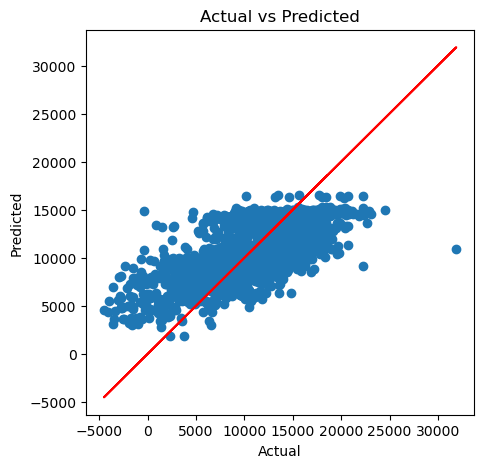

In [50]:
# Create figure and axes
f, ax = plt.subplots(figsize=(5,5))

# Plot on axes
ax.set_title('Actual vs Predicted')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.scatter(y_test,y_pred)
ax.plot(y_test,y_test,'r')
plt.show()

In [51]:
# 2 trees in forest
forest_1 = RandomForestRegressor(n_estimators=2, max_depth=5, random_state=23)

# 20 trees in forest
forest_2 = RandomForestRegressor(n_estimators=20, max_depth=5, random_state=23)

# 100 trees in forest
forest_3 = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=23)

In [52]:
forest_1.fit(x_train, y_train)
forest_2.fit(x_train, y_train)
forest_3.fit(x_train, y_train)

RandomForestRegressor(max_depth=5, random_state=23)

#### Evaluate One or More ML Models:
- Once our models are trained, we evaluate their performance.
- Use metrics like Mean Squared Error (MSE) and R-squared (R²) to assess how well our models predict the three-hour load shortfall. 
- This evaluation will help us identify the model(s) that perform best for our specific task.

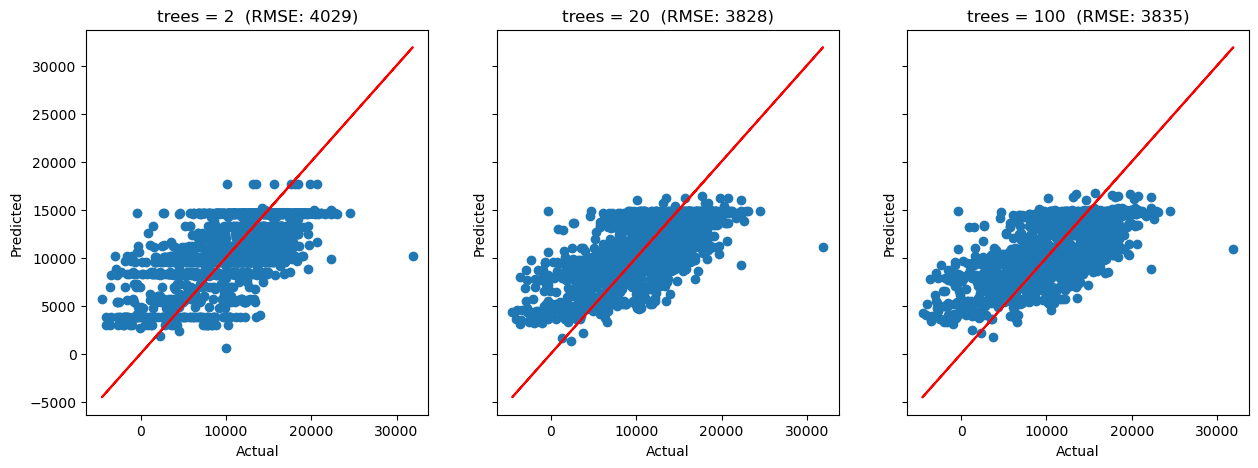

In [53]:
# evaluate one or more ML models
# Create figure and axes
f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=3,sharey=True)

# Create list of titles and predictions to use in for loop
pred = [forest_1.predict(x_test), forest_2.predict(x_test), forest_3.predict(x_test)]
title = ['trees = 2', 'trees = 20', 'trees = 100']

# Loop through all axes to plot each model's results 
for i in range(3):
    rmse = round(np.sqrt(mean_squared_error(pred[i],y_test)))
    ax[i].set_title(title[i]+"  (RMSE: "+str(rmse)+ ")")
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test,y_test,'r')
    ax[i].scatter(y_test,pred[i]) 

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |
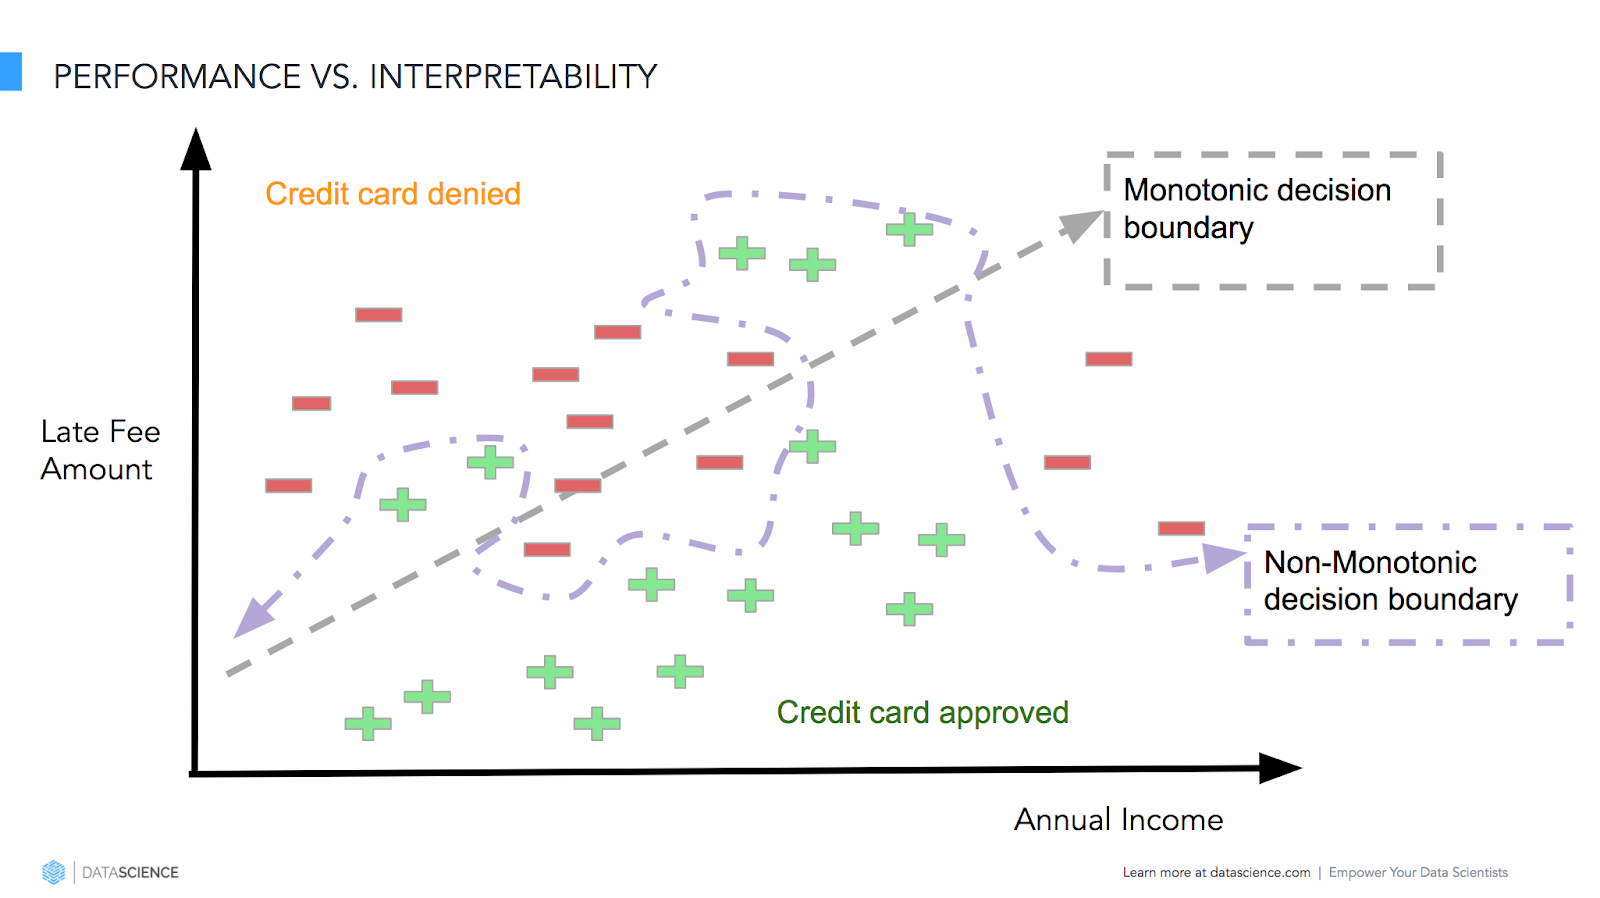
---

In [54]:
# Compare model performance
# Fit regression decision tree model
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=5)
DT.fit(x_train,y_train)


DecisionTreeRegressor(max_depth=5)

In [55]:
DT_pred = DT.predict(x_test)
DT_R2 = r2_score(y_test, DT_pred)

In [56]:
# Fit linear regression model
from sklearn.linear_model import LinearRegression
LR = LinearRegression(fit_intercept=True)
LR.fit(x_train,y_train)

LinearRegression()

In [57]:
LR_pred = LR.predict(x_test)
LR_R2 = r2_score(y_test, LR_pred)

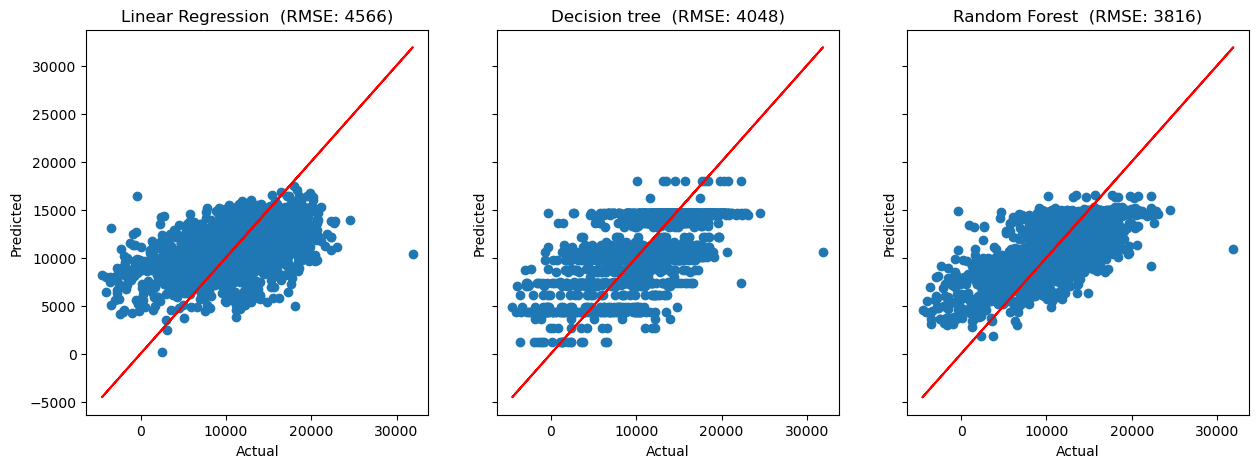

In [59]:
# Create figure and axes
f, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=3, sharey=True)

# Create list of titles and predictions to use in for loop
pred = [LR.predict(x_test), DT.predict(x_test), RF.predict(x_test)]
title = ['Linear Regression','Decision tree', 'Random Forest']

# Loop through all axes to plot each model's results 
for i in range(3):
    rmse = round(np.sqrt(mean_squared_error(pred[i],y_test)))
    ax[i].set_title(title[i]+"  (RMSE: "+str(rmse)+ ")")
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test,y_test,'r')
    ax[i].scatter(y_test,pred[i])

In [60]:
results_dict = {'Training R-Square Score':
                        {
                            "Linear Regression Model": LR_R2,
                            "Decission Tree": DT_R2,
                            "Random Forest": RF_R2
                        }
               }

results_df = pd.DataFrame(data=results_dict)


In [61]:
results_df

Training R-Square Score
Decission Tree                          0.395990
Linear Regression Model                 0.231402
Random Forest                           0.463175

### MAKING SUBMISSION 

In [62]:
# for Submission
x_train = df_clean[:len(df_train)].drop('load_shortfall_3h',axis=1)
x_test = df_clean[len(df_train):].drop('load_shortfall_3h',axis=1)

In [63]:
# FIT LINEAR MODEL
LR.fit(x_train, y)
LR_pred = LR.predict(x_test)

In [64]:
pred_y = pd.DataFrame(LR_pred, columns = ['load_shortfall_3h'])
pred_y.head()

load_shortfall_3h
0        9497.041564
1        9080.877448
2       10202.155202
3       10005.615768
4        9639.380287

In [65]:
# Decission Tree
DT.fit(x_train, y)
DT_pred = DT.predict(x_test)

In [66]:
pred_ry= pd.DataFrame(DT_pred,columns= ['load_shortfall_3h'])
pred_ry.head()

load_shortfall_3h
0       13711.416667
1        9139.462963
2        9139.462963
3        9139.462963
4       14760.016260

In [67]:
#Random Forest Regression
RF.fit(x_train, y)
RF_pred = RF.predict(x_test)

In [68]:
pred_RF= pd.DataFrame(RF_pred,columns= ['load_shortfall_3h'])
pred_RF.head()

load_shortfall_3h
0       10376.409459
1        7327.356313
2        6894.261557
3        9147.694935
4       11237.563661

In [69]:
# Output for the Ranom Forest Regression ( Our Best Result)
output_RF = pd.DataFrame({'time':df_test['time']})
submission_RF = output_RF.join(pred_RF)
submission_RF.to_csv('team_submission_Rf.csv', index = False)

In [160]:
submission_RF

time  load_shortfall_3h
0     2018-01-01 00:00:00       10,432.79669
1     2018-01-01 03:00:00        7,782.76111
2     2018-01-01 06:00:00        7,657.10907
3     2018-01-01 09:00:00        9,427.42534
4     2018-01-01 12:00:00       11,147.69326
...                   ...                ...
2915  2018-12-31 09:00:00       12,234.75903
2916  2018-12-31 12:00:00       12,492.12702
2917  2018-12-31 15:00:00       12,735.08154
2918  2018-12-31 18:00:00       12,735.08154
2919  2018-12-31 21:00:00       12,557.47460

[2920 rows x 2 columns]

### Choose best model and motivate why it is the best choice

Random Forest

- less overfitting compared to a single tree (i.e. generalizes much better);
- Requires little data preparation - e.g. no real need to standardize features;
- Extremely flexible and usually have high prediction accuracy

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |
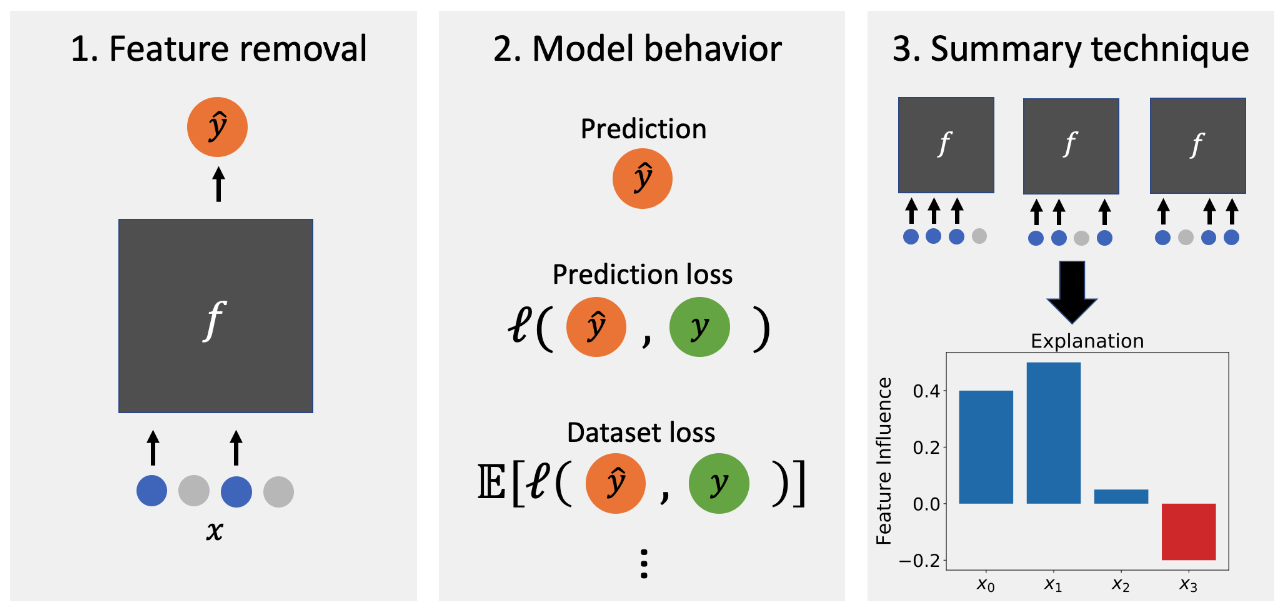
---

## How do Random Forests Work?

### 1. Fitting data:
_N_ refers to the number of observations (rows) in the training dataset, and _p_ the number of predictor variables (columns). The following is the typical algorithm for a Random Forest:

1. **Bootstrapping**: Drawing with replacement from the training dataset, randomly sample _N_ observations.
2. Use the _N_ observations to grow a random forest tree as follows:<br>
_<br>
At each node:<br>
i. Select a random subset, $m$, of predictor variables, where $m<\sqrt{p}$.<br>
ii. Pick the best variable/split-point among the selected predictor variables.<br>
iii. Divide data into two subsets based on the selected split.<br>
iv. Repeat until stopping criteria satisfied (e.g. minimum node sample size reached)._
<br>
3. Repeat until desired number of random forest trees is reached.


### 2. Making Predictions:


Random forests combine multiple trees to make a prediction as follows:
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/random_forest.png">


In summary, Random Forests work by creating an ensemble of decision trees, each trained on a different subset of data and variables. The collective wisdom of these trees provides a more stable and accurate prediction, making Random Forests a powerful machine learning technique.